## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

Modify any of the numbers and rerun the cell.

In [24]:
df.head()

date warehouse client_type           product_line  quantity  \
0 2021-06-01   Central      Retail          Miscellaneous         8   
1 2021-06-01     North      Retail        Breaking system         9   
2 2021-06-01     North      Retail  Suspension & traction         8   
3 2021-06-01     North   Wholesale           Frame & body        16   
4 2021-06-01   Central      Retail                 Engine         2   

   unit_price   total      payment  
0       16.85  134.83  Credit card  
1       19.29  173.61         Cash  
2       32.93  263.45  Credit card  
3       37.84  605.44     Transfer  
4       60.48  120.96  Credit card

## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

In [25]:
# What are the total sales for each payment method?
df.describe()

quantity   unit_price        total
count  1000.000000  1000.000000  1000.000000
mean      9.395000    30.322040   289.113000
std       9.659207    12.256488   345.227596
min       1.000000    10.030000    10.350000
25%       4.000000    21.085000    93.687500
50%       6.500000    28.570000   178.360000
75%      10.000000    37.917500   321.690000
max      40.000000    66.620000  2546.330000

In [26]:
# What are the total sales for each payment method?
df.groupby('payment')[['total']].sum()

total
payment               
Cash          19199.10
Credit card  110271.57
Transfer     159642.33

In [27]:
# Using the groupby()method to find the total sales for each payment method
df.groupby('payment')['total'].sum()


payment
Cash            19199.10
Credit card    110271.57
Transfer       159642.33
Name: total, dtype: float64

# Bank transfers is the method with the highest number of Sales as shown in the table above 

In [28]:
# What is the average unit price for each product line?
df.groupby('product_line')['unit_price'].mean()

product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64

# The mean which is the average for each productline is shown above using the groupby method, therefore the average unit price per product line is shown above.
# The figure above also shows that Engine is the most expensive product line sold by the company.

In [29]:
# Create plots to visualize findings for questions 1 and 2.
# First check if the data is clean to ensure smooth running of all codes.
df.info()
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np

#avg_units_client_type = df.groupby('client_type')['quantity'].mean()
#avg_units_client_type.plot(kind='barh')
#plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


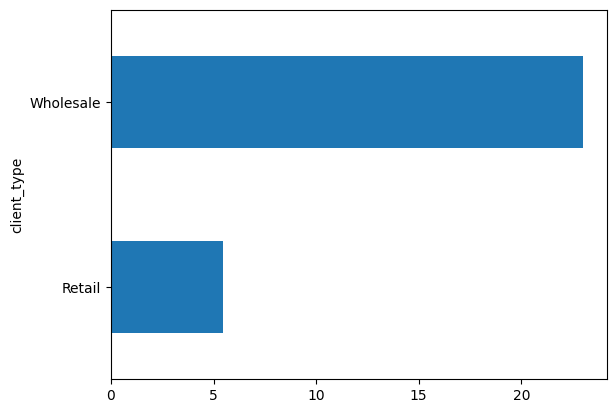

In [30]:
# Visualization of Question 1 Findings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

avg_units_client_type = df.groupby('client_type')['quantity'].mean()
avg_units_client_type.plot(kind='barh')
plt.show()

In [31]:
# Data Visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns



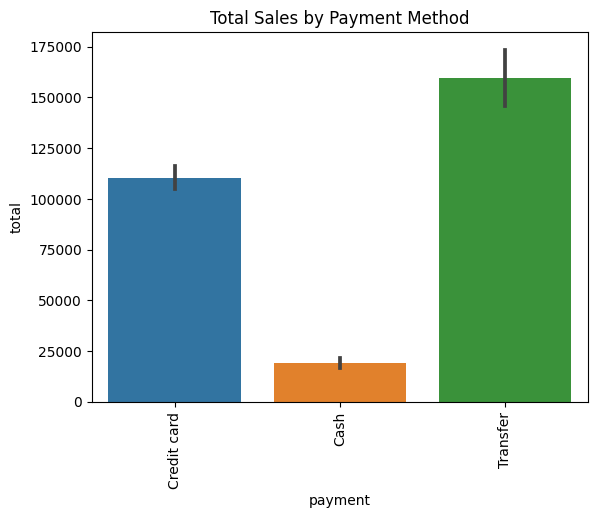

In [32]:
# Data Visualization Continued
# import seaborn as sns
p = sns.barplot(x= 'payment', y = 'total', data = df, estimator = np.sum )
p.set(title = 'Total Sales by Payment Method')
p.set_xticklabels(p.get_xticklabels(), rotation = 90);

# Bank transfers is the most used payment method while credit cards is the second most popular method amongts clients as illustrated above.

In [33]:
df.groupby('product_line')['unit_price'].mean()

product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64

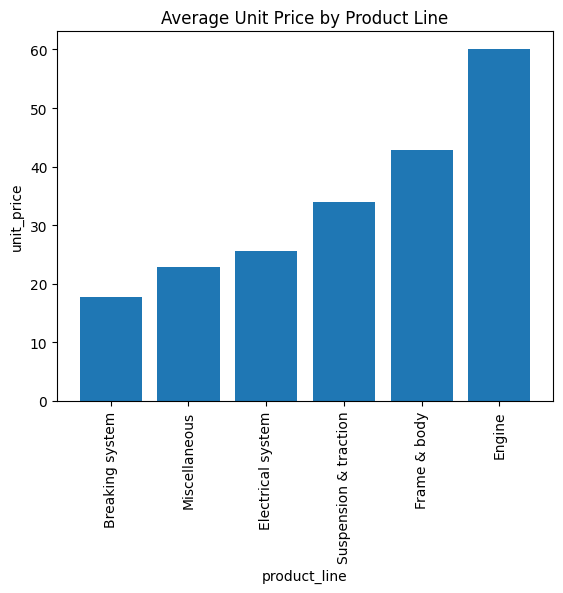

In [34]:
# Data Visualization Sample 2
avg_unit_price = df.groupby('product_line')['unit_price'].mean().sort_values()
plt.bar(x = avg_unit_price.index, height = avg_unit_price.values)
plt.xlabel('product_line')
plt.ylabel('unit_price')
plt.title('Average Unit Price by Product Line')
plt.xticks (rotation = 90)
plt.show()

# The figure above shows that Engine is the most expensive product line sold by the company.

In [35]:
# Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
df.groupby('product_line')['unit_price'].sum().sort_values()

product_line
Miscellaneous            2782.91
Engine                   3665.60
Breaking system          4080.32
Electrical system        4937.93
Frame & body             7110.15
Suspension & traction    7745.13
Name: unit_price, dtype: float64

In [36]:
df.groupby('product_line')['unit_price'].count()

product_line
Breaking system          230
Electrical system        193
Engine                    61
Frame & body             166
Miscellaneous            122
Suspension & traction    228
Name: unit_price, dtype: int64

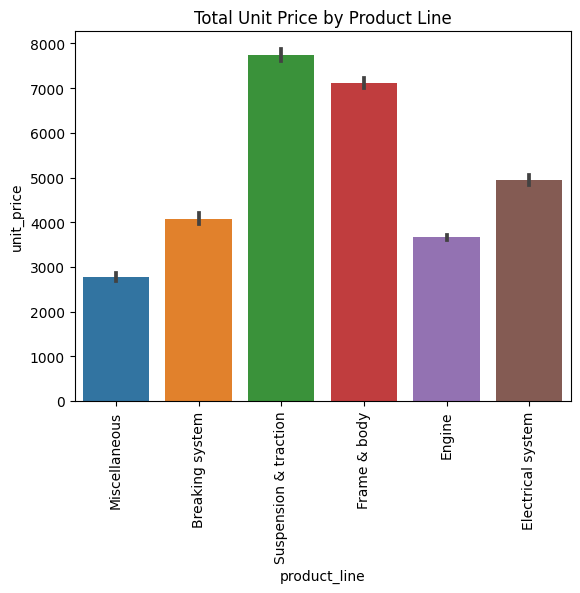

In [37]:
p = sns.barplot(x= 'product_line', y = 'unit_price', data = df, estimator = np.sum )
p.set(title = 'Total Unit Price by Product Line')
p.set_xticklabels(p.get_xticklabels(), rotation = 90);

# According to the chart above suspension & traction is the product line with the highest unit price and this is conflicting with the other observations above, therefore, the engine product line is visualized on its own to check for descrepencies. 

[Text(0.5, 1.0, 'unit price for Engine')]

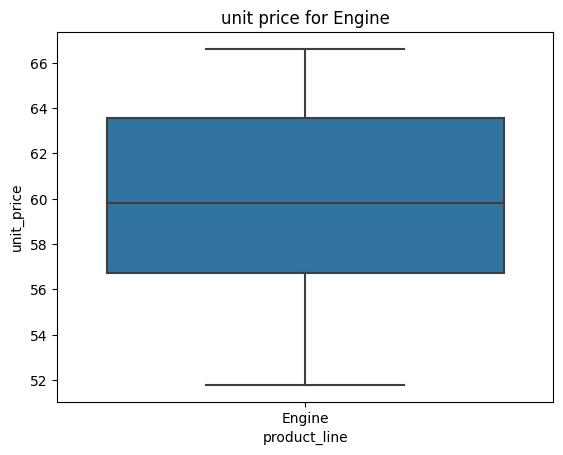

In [38]:
# Finding the Average Unit Price for Engine
productline = 'Engine'
df_product_line = df[df.product_line == productline]
p = sns.boxplot(x= 'product_line', y = 'unit_price', data = df_product_line)
p.set(title = f'unit price for {productline}')



# As Shown in the boxplot above there are no outliers in the engine product line and all values are lying in the sane quatile range.

In [39]:
df.groupby('product_line')['unit_price'].count()


product_line
Breaking system          230
Electrical system        193
Engine                    61
Frame & body             166
Miscellaneous            122
Suspension & traction    228
Name: unit_price, dtype: int64

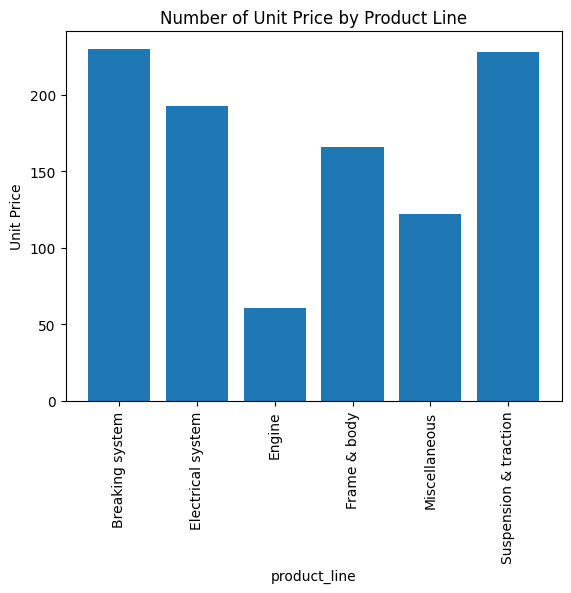

In [40]:
# Visualization of the Above Finidings for Engine to Check for Descrepencies. 
num_unit_price = df.groupby('product_line') ['unit_price'].count()
plt.bar(x = num_unit_price.index, height = num_unit_price.values)
plt.xlabel('product_line')
plt.ylabel('Unit Price')
plt.title('Number of Unit Price by Product Line')
plt.xticks (rotation = 90)
plt.show()


# As illustrated in the above bargraph the Engine product line has the lowest units sold and this affects the mean as shown in the box plot above.

<AxesSubplot:xlabel='client_type'>

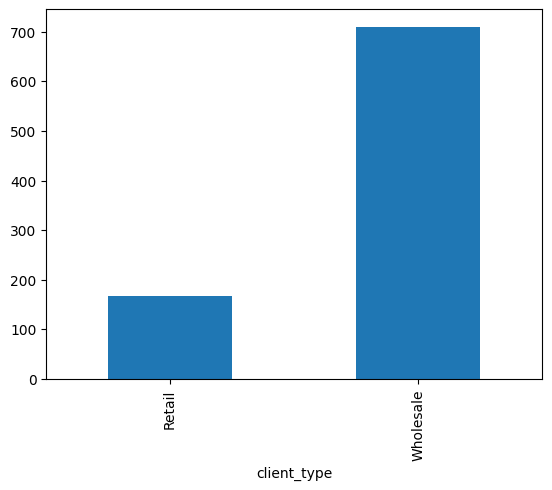

In [41]:
# Average Purchase by Client Type
total_client = df.groupby('client_type')['total'].mean()
total_client.plot(kind = 'bar')

<AxesSubplot:xlabel='warehouse,client_type'>

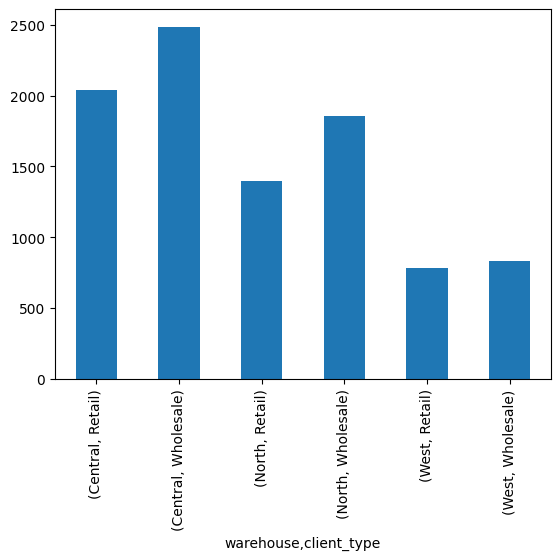

In [42]:
# Warehouse Sales
warehouse_clienttype = df.groupby(['warehouse','client_type'])['quantity'].sum()
warehouse_clienttype.plot(kind = 'bar')

Summary of all findings 
# The Central warehouse sold the most with almost 2500 sales as shown in the graph above.
# The Wholesalers purchased the most compared to the retailers.
# The Engine product line has the lowest units sold, this could be because Engine was the most expensive product line and this may have discouraged customers from buying it.
# Therefore, it is hypothesized that there is a correlation between the high price of the Engine product line and the number of units sold based on the observations. This is just a hypothesis as there can be other factors that contributed to the low sales as the frequency at which the consumers change there engine also matters.
# In contrast to the Engine product line being the least sold product, the breaking sytem had the highest number of units sold amongst all product lines, this could be because the breaking sytem might be easier to change compared to engines.